In [5]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
x = np.linspace(1,1000,20000)
y=0.2*x+14

In [3]:
stats.linregress(x,y)

LinregressResult(slope=0.20000000000000004, intercept=13.999999999999972, rvalue=1.0, pvalue=0.0, stderr=0.0)

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
df = pd.DataFrame({"x":x,"y":y})

In [11]:
m = ols("y~x",df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.945e+35
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:05:18   Log-Likelihood:             6.0405e+05
No. Observations:               20000   AIC:                        -1.208e+06
Df Residuals:                   19998   BIC:                        -1.208e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0000   2.62e-16   5.34e+16      0.0

In [12]:
t = sm.stats.anova_lm(m)

In [13]:
print(t)

               df        sum_sq       mean_sq             F  PR(>F)
x             1.0  6.654005e+07  6.654005e+07  1.945195e+35     0.0
Residual  19998.0  6.840794e-24  3.420739e-28           NaN     NaN


# 24th December 2019

In [2]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [13]:
x,y=make_moons(n_samples=100,noise=.75)

In [14]:
y

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [17]:
x_tr,x_t,y_tr,y_t=train_test_split(x,y,test_size=0.2)

In [18]:
m = DecisionTreeClassifier()
m.fit(x_tr,y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_p=m.predict(x_t)
accuracy_score(y_t,y_p)

0.75

In [21]:
m1 = RandomForestClassifier(n_estimators=10000)
m1.fit(x_tr,y_tr)
y_p1 = m1.predict(x_t)
accuracy_score(y_t,y_p1)

0.75

# 30th December 2019 Predictive

In [1]:
from scipy.optimize import *

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
def obj(x):
    return -4*x[0] - 5*x[1]
def cons1(x):
    return -x[0] -x[1] + 90
def cons2(x):
    return -3*x[0] - 7*x[1] + 200
x=[1,1]
b=(1.0,100.0)
bnds=(b,b)
cons=({'type':'ineq','fun':cons1},{'type':'ineq','fun':cons2})
res = minimize(obj,x,method='SLSQP',bounds=bnds,constraints=cons)

#SLSQP - Simplex and least square Product

In [7]:
res

     fun: -262.3333333331673
     jac: array([-4., -5.])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([64.33333333,  1.        ])

In [8]:
#function is giving the optimized value
#nfev - it ran 24 times and 6 times it got the same result
# We have to check the message 'Optimization terminated successfully.'

## Problem

In [9]:
# Bracelet, Necklace, Earnings

In [34]:
def obj(x):
    return -300*x[0] - 200*x[1] - 100*x[2]
def cons1(x):
    return -.35*x[0] - .15*x[1] - .05*x[2] + 160
def cons2(x):
    return -1.2*x[0] - .75*x[1] -.5*x[2] + 800
x=[0,0,0]
b=(0,2000) #This means constraint can take value from 1 to the upper value
bnds=(b,b,b)
cons=({'type':'ineq','fun':cons1},{'type':'ineq','fun':cons2})
res = minimize(obj,x,method='SLSQP',bounds=bnds,constraints=cons)

#SLSQP - Simplex and least square Product

In [35]:
res

     fun: -213333.3333340549
     jac: array([-300., -200., -100.])
 message: 'Optimization terminated successfully.'
    nfev: 41
     nit: 9
    njev: 8
  status: 0
 success: True
       x: array([1.54039235e-09, 1.06666667e+03, 5.15392845e-10])

# PFA-2 30th December 2019

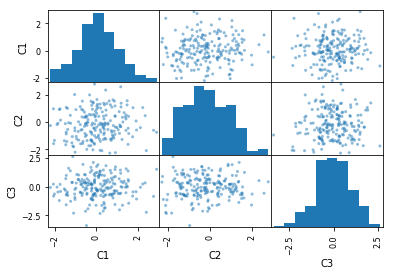

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.DataFrame({"C1":np.random.randn(200),"C2":np.random.randn(200),"C3":np.random.randn(200)})
data['Gender']=data['C1']>0.5
pd.plotting.scatter_matrix(data[['C1', 'C2', 'C3']])
plt.show()

#It shows correlation and distribution at the same time

In [4]:
data.head()

,C1,C2,C3,Gender
0,-1.712857,-0.056192,-0.128815,False
1,-0.587244,0.391702,-0.764482,False
2,-0.604863,-0.315319,-0.474149,False
3,-0.191037,1.674679,0.369936,False
4,0.458287,0.176017,0.033302,False


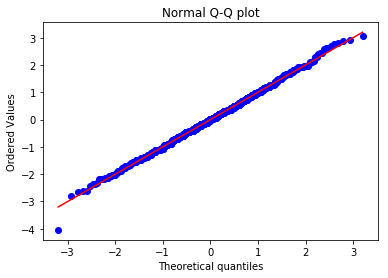

In [9]:
from scipy import stats
stats.ttest_1samp(data['C1'], 0) #0 is population mean
female = data[data['Gender'] == True]['C1']
male = data[data['Gender'] == False]['C1']
stats.ttest_ind(female, male) #independent t-test
stats.ttest_rel(data['C1'], data['C2'])   #paired t-test
stats.wilcoxon(data['C1'], data['C2']) #Non-parametric paired test
stats.mannwhitneyu(data['C1'],data['C2']) #Non-parametric independent test
N = 1200
p = 0.53
q = 1000 #No. of trials
obs = np.random.binomial(N, p, size = q)/N
z = (obs-np.mean(obs))/np.std(obs)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [10]:
stats.ttest_rel(data['C1'], data['C2'])

Ttest_relResult(statistic=2.434396546685804, pvalue=0.015798724676966865)

In [11]:
stats.ttest_ind(female, male)

Ttest_indResult(statistic=16.794722431762942, pvalue=6.1429824635834535e-40)

In [12]:
stats.wilcoxon(data['C1'], data['C2'])

WilcoxonResult(statistic=8095.0, pvalue=0.017059042999561482)

In [13]:
stats.mannwhitneyu(data['C1'],data['C2'])

MannwhitneyuResult(statistic=17275.0, pvalue=0.009222981515106619)

### Using Data - Mtcars

In [17]:
df = pd.read_csv("T2_F_mtcars.csv")

In [18]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [19]:
#To check if displacement is in the range of 200
stats.ttest_1samp(df['disp'], 200) #0 is population mean

Ttest_1sampResult(statistic=1.4022188210452098, pvalue=0.17078478029930355)

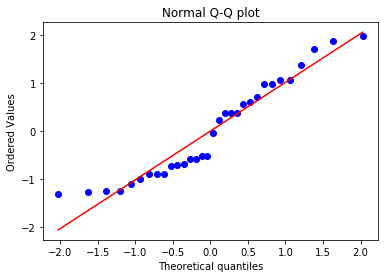

In [24]:
#is displacement following normal distribution

z = (df['disp']-np.mean(df['disp']))/np.std(df['disp'])

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [27]:
# Compare No.of cylinder and No. of Gears
# We would be using non-parametric mann whitney U test

stats.mannwhitneyu(df['cyl'],df['gear'])

MannwhitneyuResult(statistic=121.0, pvalue=2.6506340436592417e-08)

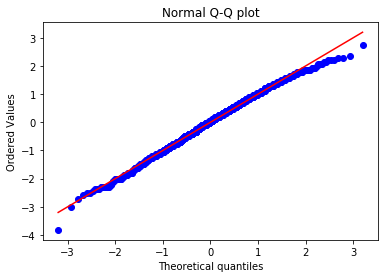

In [28]:
# Checking normality after changing p to 0.8
N = 1200
p = 0.8
q = 1000 #No. of trials
obs = np.random.binomial(N, p, size = q)/N
z = (obs-np.mean(obs))/np.std(obs)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

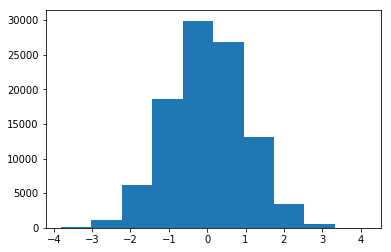

In [29]:
obs = np.random.randn(100000)
plt.hist(obs)
plt.show()

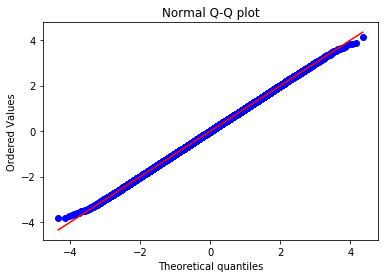

In [30]:
z = (obs-np.mean(obs))/np.std(obs)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

## Parallel Cordinate Plots

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

df=pd.read_csv("T2_F_mtcars.csv")

In [32]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [35]:
#if its a non-numeric, we convert it

df['hp'] = pd.to_numeric(df['hp'].replace('?', np.nan))
df['mpg'] = pd.cut(df['mpg'],[8,16,24,32,50])

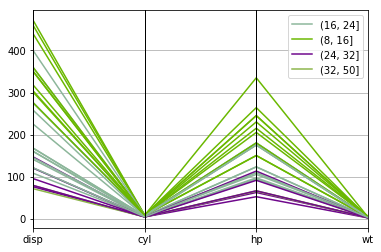

In [39]:
plt.figure()

pd.plotting.parallel_coordinates(
    df[['mpg','disp','cyl','hp','wt']],'mpg')

plt.show()

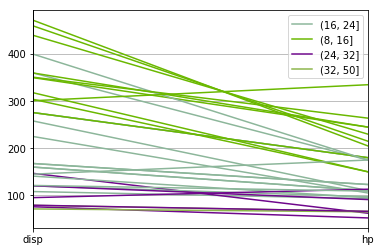

In [46]:
plt.figure()

pd.plotting.parallel_coordinates(
    df[['mpg','disp','hp']],'mpg')

plt.show()

In [53]:
list(enumerate("MBA IDS"))

[(0, 'M'), (1, 'B'), (2, 'A'), (3, ' '), (4, 'I'), (5, 'D'), (6, 'S')]

#### Correlation Plots

In [54]:
import numpy as np
x = np.random.randint(0, 50, 1000)
y = x + np.random.normal(0, 10, 1000)
np.corrcoef(x, y)

array([[1.        , 0.83516086],
       [0.83516086, 1.        ]])

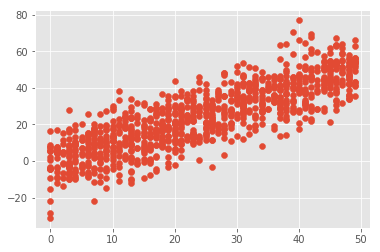

In [55]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.show()

In [56]:
import pandas as pd

df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) 
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) 
df['d'] = np.random.randint(0, 50, 1000) 

df.corr()

,a,b,c,d
a,1.000000,0.813012,-0.942542,-0.044679
b,0.813012,1.000000,-0.766192,-0.050770
c,-0.942542,-0.766192,1.000000,0.035284
d,-0.044679,-0.050770,0.035284,1.000000


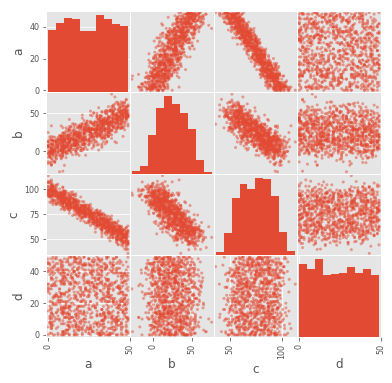

In [57]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

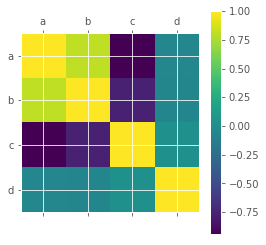

In [58]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## Work

In [ ]:
def obj(x):
    return -x[0] - x[1] - x[2]
def cons1(x):
    return -.35*x[0] - .15*x[1] - .05*x[2] + 160
def cons2(x):
    return -1.2*x[0] - .75*x[1] -.5*x[2] + 800
x=[0,0,0]
b=(0,2000) #This means constraint can take value from 1 to the upper value
bnds=(b,b,b)
cons=({'type':'ineq','fun':cons1},{'type':'ineq','fun':cons2})
res = minimize(obj,x,method='SLSQP',bounds=bnds,constraints=cons)

#SLSQP - Simplex and least square Product